# Time series forecasting fundamentals with TensorFlow + Milestone Project 3: BitPredict

Let's download and refine our Bitcoin price data

In [57]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-06-19 17:00:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-06-19 17:00:33 (7.14 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [178509/178509]



## importing time series with pandas

In [58]:
#import with pandas
import pandas as pd
#let's read in our bitcoin data and parse the dates
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates = ["Date"],
                 index_col = ["Date"]) #parse the date column and tell pandas column 1 is datetime

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [60]:
#how many samples do we have
len(df)

2787

We've collected the historical price of Bitcoin for the past 8 years but there are only 2787 samples

Typically deep learning models usually like los of data samples( from 100 thousands to millions)

The Seasonality of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has a seasonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year

In [61]:
# only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns = {"Closing Price (USD)":"Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


Text(0.5, 1.0, 'Price of Bitcoin from 1 oct 2013 to 18 May 2021')

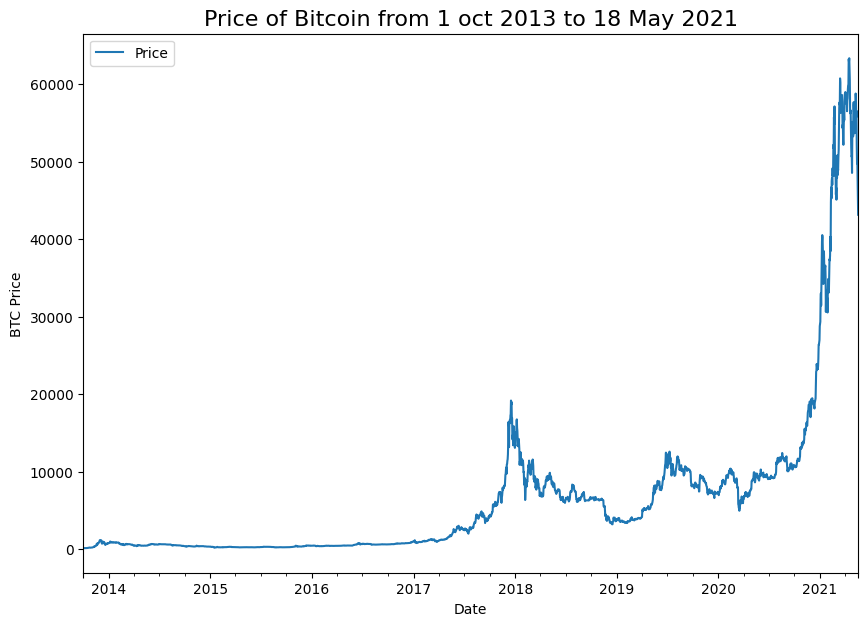

In [62]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize = (10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 oct 2013 to 18 May 2021", fontsize = 16)

## Importing time series data with Python's CSV module

In [63]:
#importing and formatting historical Bitcoin data with PYthon
import csv
from datetime import datetime

timesteps = []
btc_prices = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter = ",")
  next(csv_reader) #skip the first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) #get the dates
    btc_prices.append(float(line[2])) #get the closing price as float

#view first 10 of each
timesteps[:10], btc_prices[:10]


([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

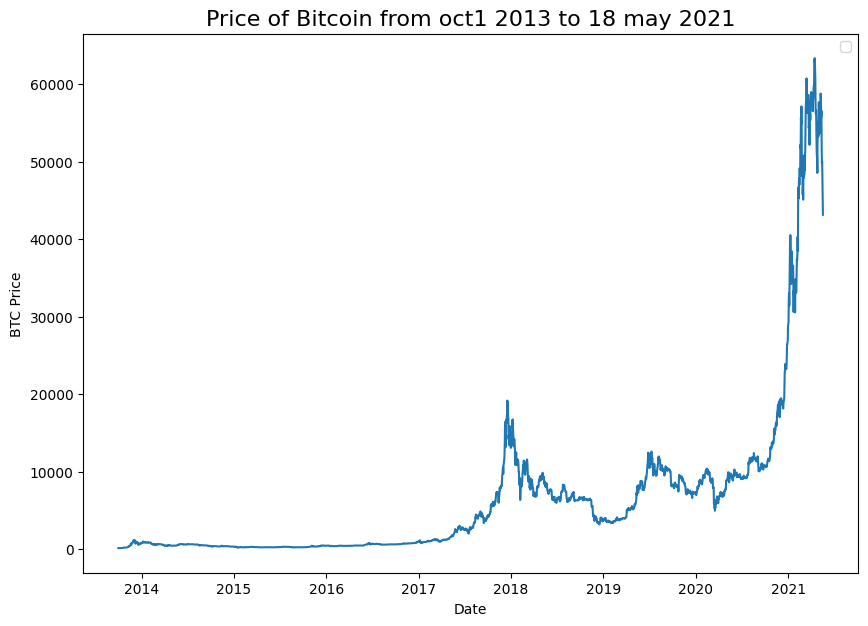

In [64]:
#plot from csv
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize = (10, 7))
plt.plot(timesteps, btc_prices)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from oct1 2013 to 18 may 2021", fontsize = 16)
plt.legend()
plt.xlabel("Date")

## Format data part 1: Create train and test sets of our time series data

### Creating train and test sets with time series data (the wrong way)

In [65]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [66]:
#get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10],  prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [67]:
# Wrong way to make train test splits for time series data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(timesteps, #dates
                                                    prices, #BTC prices
                                                    test_size = 0.2,
                                                    random_state = 42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

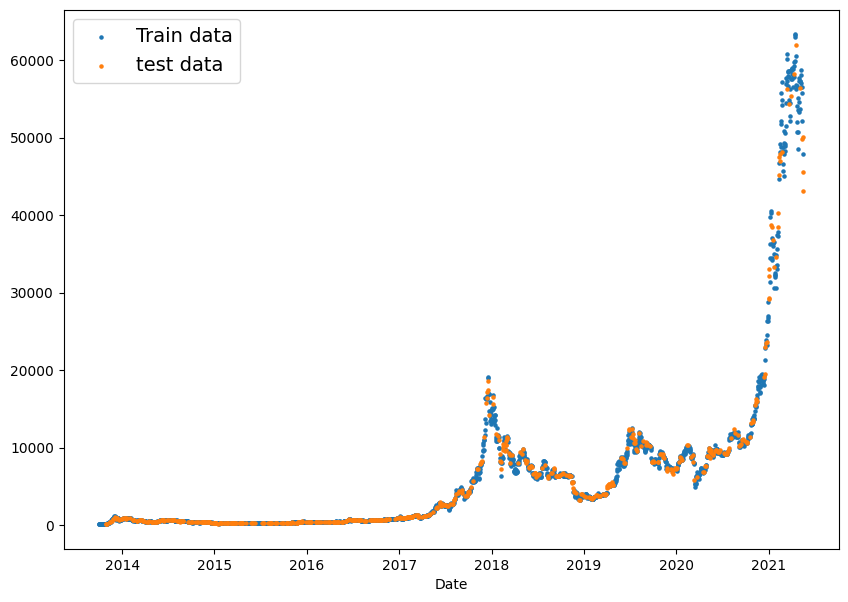

In [68]:
#let's plot wrong train and test split
plt.figure(figsize = (10, 7))
plt.scatter(x_train, y_train, s = 5, label = "Train data")
plt.scatter(x_test, y_test, s = 5, label = "test data")
plt.xlabel("Date")
plt.legend(fontsize = 14)
plt.show();

### create train and test sets for time series (the right way)

In [69]:
# create train and test splits the right way for the time series data
split_size = int(0.8*len(prices)) #80%train 20% test

#create train data splits (everything before the split)
x_train, y_train = timesteps[:split_size], prices[:split_size]

#create test data splits (everything  beyond the split)
x_test, y_test = timesteps[split_size:], prices[split_size:]

len(x_train), len(y_train), len(x_test), len(y_test)

(2229, 2229, 558, 558)

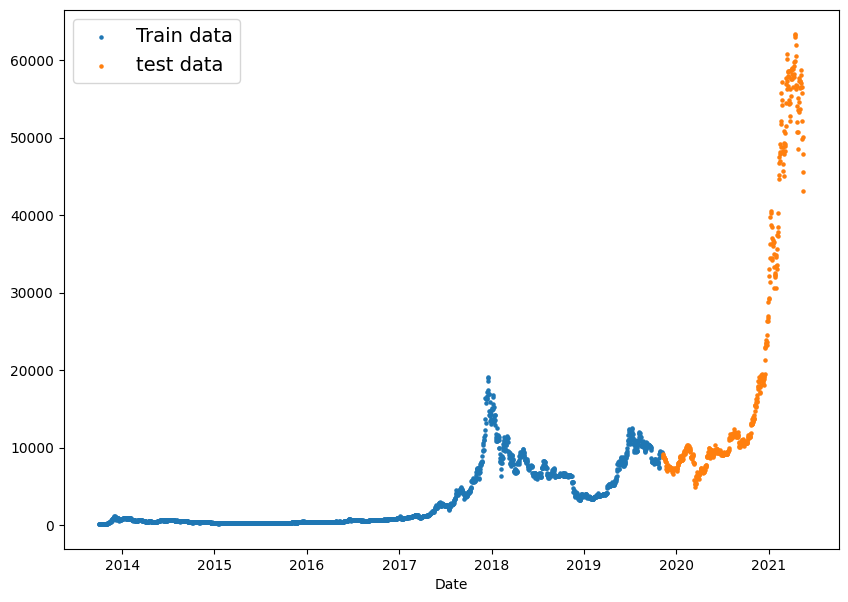

In [70]:
#let's plot wrong train and test split
plt.figure(figsize = (10, 7))
plt.scatter(x_train, y_train, s = 5, label = "Train data")
plt.scatter(x_test, y_test, s = 5, label = "test data")
plt.xlabel("Date")
plt.legend(fontsize = 14)
plt.show();

## Create a plotting function
Typing plotting code is tedious , let's functionize it

In [71]:
#create a function to plot time series data
def plot_time_series(timesteps, values, fomrat = ".", start = 0, end = None, label = None):
  """
  plots timesteps (a seires of points in time) against values (a series of valuesacross timesteps)

  Parameters
  -----------
  timesteps : array of timestep values
  value : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timestep)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values
  """

  #Plot the series
  plt.plot(timesteps[start:end], values[start:end])
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  plt.legend(fontsize = 14)
  plt.grid(True)


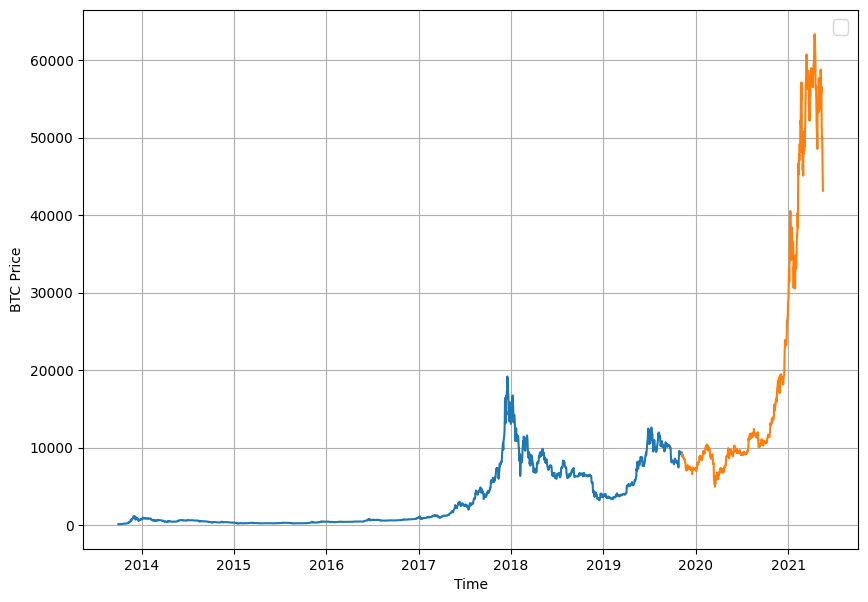

In [72]:
#Test our plotting function
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = x_train,
                 values = y_train,
                 label = "train data")

plot_time_series(timesteps = x_test,
                 values = y_test,
                 label = "test data")

## Modelling experiments
we've got some bitcoin hsitorical data, to model it, let's run up a series of modelling experiments

Terms to be familiar with

* Horizon = number of timesteps into the future we are going to predict

* Window size = number of timesteps we are going to use to predict horizon

Modelling experiments we are running:

* Naive Model
* Dense model, horizon =1, window =7,
* Dense model, horizon = 1, window =30,
* Dense model, horizon = 7, window = 30,
* Conv1D
* LSTM
* Dense model, but with multivariate data
* N-BEATS algorithm,
* Ensemble (multiple models optimzed on different loss functions)
* Future prediction model ( model to predict future)
* Dense model, (but with turket data introduced)


## Model 0: Navive forecast (baseline)

The formula looks like this:

$$ \hat{y}_{t} = y_{t}$$

In English:

> The prediction at timestep t (y_hat) is equal to the value at timestep t-1 (previous timestep) - this is for a hroizon of 1.



In [73]:
#create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [74]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

In [75]:
len(naive_forecast)

557

In [76]:
len(y_test)

558

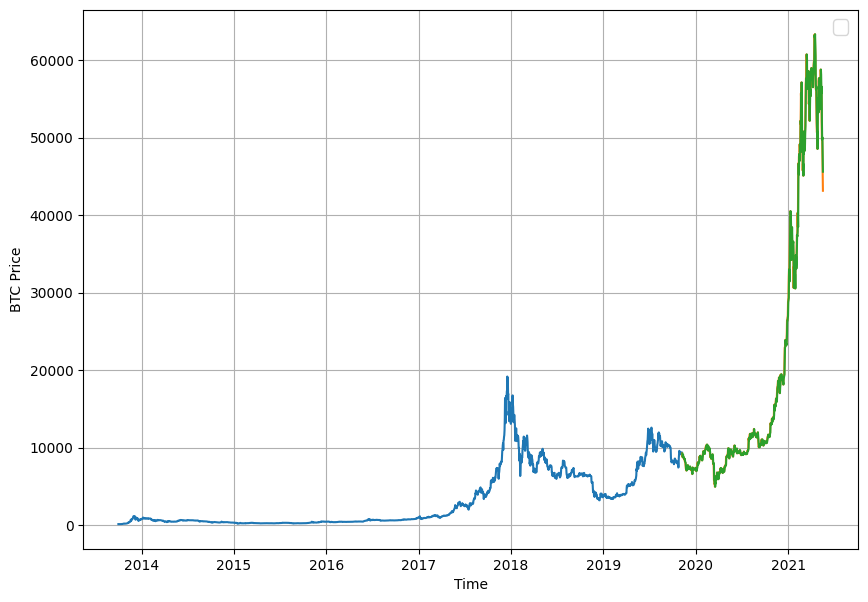

In [77]:
#plot naive forecast
plt.figure(figsize = (10, 7))
plt.legend()
plot_time_series(timesteps = x_train, values = y_train, label = "Train_data")
plot_time_series(timesteps = x_test, values = y_test, label = "Test_data")
plot_time_series(timesteps = x_test[1:], values = naive_forecast, fomrat=".", label = "Naive_Forecast")


## Evaluating a time series model

Let's look into some evaluation metrics for time series forecasing.

We're predicting a number, so that means we have a form of a regession problem.

Because we're working with a regression problem, we'll need some regression metrics.

A few common regression metrics which can also be used for time series are:
* MAE - mean absolute error
* MSE - Mean Squared Error
* RMSE - Root Mean Squared Error
* MAPE - Mean absolute precentage error
* MASE - Mean absolute scaled error

In [78]:
import tensorflow as tf


In [79]:
# MASE Implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data)
  """

  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  #Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae / mae_naive_no_season

In [80]:
mean_absolute_scaled_error(y_true = y_test[1:],
                           y_pred = naive_forecast).numpy()

0.9995699939182624

In [81]:
# create a function to take in model predictions and truth values and return evaluated results in a dictionary
def evaluate_preds(y_true, y_pred):
  #make sure float32 datatype (for metric calculation)\
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)


  #Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

That's one good looking evaluation function. let's see if it wporks


In [82]:
naive_results = evaluate_preds(y_true = y_test[1:],
                               y_pred = y_test[:-1])

naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

## Format Data Part 2: Windowing our dataset

Why do we window?

We window our time series dataset to turn our data into supervised learning problem

```
windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
````
`

In [83]:
#given
len(y_train)

2229

In [84]:
print(f"We want to use {btc_prices[:7]}\nto predict {btc_prices[7]}")

We want to use [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795]
to predict 123.033


Let's write a function to do this for us.

In [85]:
# Let's setup global variables for window and horizon size
HORIZON = 1 #predict the next one day
WINDOW_SIZE = 7 #use  the past week data for this

In [86]:
# create function to label windowed data
def get_labelled_window(x, horizon = HORIZON):
  """
  Creates labels for windowed dataset.
  E.g. if horizon = 1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output:[0, 1, 2, 3, 4, 5, 6]  [7]
  """
  return x[:, :-horizon], x[:, -horizon]

In [87]:
z = tf.range(8)+1

In [88]:
z[:-1], z[-1]

(<tf.Tensor: shape=(7,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7], dtype=int32)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=8>)

In [89]:
tf.expand_dims(tf.range(8)+1, axis = 0)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7, 8]], dtype=int32)>

In [90]:
# test out the window lebelling function
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8)+1, axis = 0))
test_window, test_label


(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([8], dtype=int32)>)

We've got a way to label our windowed data.

However , this only works ion a small scale.

 We need to find a way to do this across the entire time series.

 We could do this with python for loops, however fo rlarge timee series data that would be quite slow.

 To speed things up, we'll leverage NUmpy's array indexing.

We will write a functionwhich will:
1. Createa windowstep of specific window size(e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use Numpy indexing to create a 2D array of multpile window steps.
```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
]2, 3, 4, 5, 6, 7, 8]]
```
3. Uses the 2D array of multiple window steps (from 2) to index on a target series(e.g. the historical price of bitocin).
4. Uses our `get_labelled_window()` function we created to turn the window steps into a windows with a specific horizon

In [91]:
import numpy as np

# create function to view NumPy arrays as windows
def make_windows(x, window_size = WINDOW_SIZE, horizon = HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_szie with horizon size labels.
  """
  #1. create a window of specific wondow size
  window_step = np.expand_dims(np.arange(window_size + horizon), axis = 0)

  #2. create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis = 0).T

  print(f"window indexes:\n {window_indexes, window_indexes.shape}")


  #3. index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  #4. get labelled windows
  windows, labels = get_labelled_window(windowed_array, horizon = horizon)
  return windows, labels


In [92]:
np.expand_dims(np.arange(len(prices) - 7), axis = 0).T

array([[   0],
       [   1],
       [   2],
       ...,
       [2777],
       [2778],
       [2779]])

In [93]:
#get the windowed output

full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

window indexes:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


(2780, 2780)

In [94]:
full_windows[1]

array([125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
       123.033  ])

In [95]:
full_labels[1]

124.049

We can get the same results by using the preprocessing function from tensorflow:
https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array

## Turning windows into training and test sets

In [96]:
# make the train test splits
def make_train_test_splits(windows, labels, test_splits = 0.2):
  """
  Splits mmatching pairs into training and testing splits
  """
  split_size = int(len(windows) * (1 - test_splits)) # this will default to 80% train/20% test splits
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [97]:
# create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [98]:
train_windows[:10], train_labels[:10]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966],
        [120.65533, 121.795  , 123.033  , 124.049  , 125.96116, 125.27966,
         125.9275 ],
        [121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333],
        [123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199],
        [124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333],
        [125.96116, 125.27966, 125.9275 , 126.38333, 135.24199, 133.20333,
         142.76333]]),
 array([123.033  , 124.049  , 125.9611

In [99]:
# check to see if train labels are the same (before and after window split)
np.array_equal (np.squeeze(train_labels[:-HORIZON -1]),y_train[WINDOW_SIZE:])

True

In [100]:
y_train

array([ 123.65499   ,  125.455     ,  108.58483   , ..., 9369.62808116,
       9326.59962378, 9335.75240233])

In [101]:
np.squeeze(train_labels[:-HORIZON ])

array([ 123.033     ,  124.049     ,  125.96116   , ..., 9326.59962378,
       9335.75240233, 9226.48582088])

## Make a modelling checkpoint callback

Because our model's performance is going to fluctuate, we are going to write model checkpoint so we can compare apples to apples

More specifically, we want to compare each of our model's best performances against our other model's best performances.

For exapmple, if our model performs best on epcoh55, we're training for 100 epochs, we want to load and evaluate the model saved on epoch 55.



In [102]:
import os

#create a function to implement a MOdelCheckpoint callback with a specific filename.
def create_model_checkpoint(model_name,  save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            save_best_only = True)

## Model 1: Dense model (window = 7, horizon = 1)

Our first deep model is going to be a simple dense model:
* A single dense layer with 128 units and ReLu activation.
* An output layer with linear activation(no activation)
* Adam optimisation and MAE loss function
* Batch size of 128 (previously we used 32, however our data is quite small, so we can upscale or batch size).
* we are going to run for 100 epochs.



In [103]:
import tensorflow as tf
from tensorflow.keras import layers

#set random seed
tf.random.set_seed(42)

#1. Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
], name = "model_1_dense")

#compile the model
model_1.compile(loss = tf.keras.losses.MeanAbsoluteError(),
                optimizer =tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

#fit the model
model_1.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = 'model_1_dense')])

Epoch 1/100
 1/18 [>.............................] - ETA: 15s - loss: 3743.0137 - mae: 3743.0137 - mse: 28819082.0000

18/18 [==============================] - 2s 60ms/step - loss: 1793.7795 - mae: 1793.7795 - mse: 10070755.0000 - val_loss: 1121.5931 - val_mae: 1121.5931 - val_mse: 4151904.7500
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 378.0085 - mae: 378.0085 - mse: 554084.6250 - val_loss: 1852.6035 - val_mae: 1852.6035 - val_mse: 8096252.5000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 249.4217 - mae: 249.4217 - mse: 204811.4375

18/18 [==============================] - 1s 36ms/step - loss: 239.4964 - mae: 239.4964 - mse: 269233.3438 - val_loss: 1108.2910 - val_mae: 1108.2910 - val_mse: 3785283.2500
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 245.5266 - mae: 245.5266 - mse: 283619.0938

18/18 [==============================] - 1s 37ms/step - loss: 192.3290 - mae: 192.3290 - mse: 187297.9219 - val_loss: 1021.0574 - val_mae: 1021.0574 - val_mse: 3423309.2500
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 186.2463 - mae: 186.2463 - mse: 128520.2969

18/18 [==============================] - 1s 38ms/step - loss: 181.0045 - mae: 181.0045 - mse: 173756.5938 - val_loss: 978.6683 - val_mae: 978.6682 - val_mse: 3085825.5000
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 132.7670 - mae: 132.7670 - mse: 69554.9531

18/18 [==============================] - 1s 36ms/step - loss: 172.2103 - mae: 172.2103 - mse: 156394.0781 - val_loss: 936.1241 - val_mae: 936.1241 - val_mse: 2950206.2500
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 166.0972 - mae: 166.0972 - mse: 146469.5625 - val_loss: 940.2863 - val_mae: 940.2863 - val_mse: 2814468.2500
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 148.4612 - mae: 148.4612 - mse: 95759.2500

18/18 [==============================] - 1s 36ms/step - loss: 161.8840 - mae: 161.8840 - mse: 140525.2031 - val_loss: 887.1849 - val_mae: 887.1849 - val_mse: 2661605.7500
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 159.7745 - mae: 159.7745 - mse: 135895.5469 - val_loss: 902.5724 - val_mae: 902.5724 - val_mse: 2518122.0000
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 169.7229 - mae: 169.7229 - mse: 186034.7500

18/18 [==============================] - 1s 45ms/step - loss: 152.2706 - mae: 152.2706 - mse: 127132.2891 - val_loss: 839.7036 - val_mae: 839.7036 - val_mse: 2300424.5000
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 152.9586 - mae: 152.9586 - mse: 114028.2422

18/18 [==============================] - 1s 51ms/step - loss: 148.4285 - mae: 148.4285 - mse: 118790.7188 - val_loss: 802.5986 - val_mae: 802.5986 - val_mse: 2166536.0000
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 143.3562 - mae: 143.3562 - mse: 112890.4453 - val_loss: 817.2745 - val_mae: 817.2745 - val_mse: 2114971.2500
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 110.5761 - mae: 110.5761 - mse: 75519.0234

18/18 [==============================] - 1s 51ms/step - loss: 141.1053 - mae: 141.1053 - mse: 109691.1094 - val_loss: 787.1144 - val_mae: 787.1144 - val_mse: 2000439.7500
Epoch 14/100
12/18 [===================>..........] - ETA: 0s - loss: 135.7821 - mae: 135.7821 - mse: 105768.5547

18/18 [==============================] - 1s 66ms/step - loss: 138.0240 - mae: 138.0240 - mse: 106295.7969 - val_loss: 772.6868 - val_mae: 772.6868 - val_mse: 1927296.5000
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 134.3267 - mae: 134.3267 - mse: 66533.2031

18/18 [==============================] - 1s 37ms/step - loss: 139.2800 - mae: 139.2800 - mse: 104266.6797 - val_loss: 754.8030 - val_mae: 754.8030 - val_mse: 1848035.6250
Epoch 16/100
18/18 [==============================] - 0s 4ms/step - loss: 134.6633 - mae: 134.6633 - mse: 98093.9219 - val_loss: 775.5212 - val_mae: 775.5212 - val_mse: 1872117.6250
Epoch 17/100
18/18 [==============================] - 0s 4ms/step - loss: 132.1948 - mae: 132.1948 - mse: 95646.0469 - val_loss: 756.8497 - val_mae: 756.8497 - val_mse: 1802787.3750
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 145.7975 - mae: 145.7975 - mse: 103344.3203

18/18 [==============================] - 1s 37ms/step - loss: 131.1846 - mae: 131.1846 - mse: 95863.5312 - val_loss: 735.9705 - val_mae: 735.9705 - val_mse: 1730226.1250
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 127.9616 - mae: 127.9616 - mse: 91884.4844 - val_loss: 764.9101 - val_mae: 764.9101 - val_mse: 1798196.0000
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 146.4881 - mae: 146.4881 - mse: 116450.3438

18/18 [==============================] - 1s 36ms/step - loss: 128.3607 - mae: 128.3607 - mse: 90208.7656 - val_loss: 677.5025 - val_mae: 677.5025 - val_mse: 1570166.6250
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 147.2367 - mae: 147.2367 - mse: 98718.3438

18/18 [==============================] - 1s 37ms/step - loss: 126.7909 - mae: 126.7909 - mse: 91596.2578 - val_loss: 668.4482 - val_mae: 668.4482 - val_mse: 1534583.0000
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 186.7184 - mae: 186.7184 - mse: 195848.3281

18/18 [==============================] - 1s 37ms/step - loss: 124.0153 - mae: 124.0153 - mse: 88117.0078 - val_loss: 659.8057 - val_mae: 659.8057 - val_mse: 1504478.6250
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 138.3557 - mae: 138.3557 - mse: 87052.4141

18/18 [==============================] - 1s 36ms/step - loss: 122.4928 - mae: 122.4928 - mse: 85609.2734 - val_loss: 659.2625 - val_mae: 659.2625 - val_mse: 1514587.2500
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 138.4723 - mae: 138.4723 - mse: 94273.8516

18/18 [==============================] - 1s 37ms/step - loss: 122.9772 - mae: 122.9772 - mse: 87072.4922 - val_loss: 649.2756 - val_mae: 649.2756 - val_mse: 1458663.1250
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 134.1264 - mae: 134.1264 - mse: 75047.0859

18/18 [==============================] - 1s 38ms/step - loss: 121.8397 - mae: 121.8397 - mse: 84448.7500 - val_loss: 643.1090 - val_mae: 643.1090 - val_mse: 1437612.3750
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 124.9411 - mae: 124.9411 - mse: 73647.9688

18/18 [==============================] - 1s 36ms/step - loss: 120.9965 - mae: 120.9965 - mse: 83677.1797 - val_loss: 640.9012 - val_mae: 640.9012 - val_mse: 1422668.3750
Epoch 27/100
18/18 [==============================] - 0s 4ms/step - loss: 121.5010 - mae: 121.5010 - mse: 82929.9375 - val_loss: 651.2958 - val_mae: 651.2958 - val_mse: 1473143.7500
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 120.7538 - mae: 120.7538 - mse: 80496.6797

18/18 [==============================] - 1s 36ms/step - loss: 120.3497 - mae: 120.3497 - mse: 82839.6484 - val_loss: 636.3340 - val_mae: 636.3340 - val_mse: 1396291.2500
Epoch 29/100
18/18 [==============================] - 0s 4ms/step - loss: 118.6575 - mae: 118.6575 - mse: 80848.5859 - val_loss: 643.2670 - val_mae: 643.2670 - val_mse: 1403436.0000
Epoch 30/100
18/18 [==============================] - 0s 4ms/step - loss: 124.6327 - mae: 124.6327 - mse: 85156.0625 - val_loss: 655.8671 - val_mae: 655.8671 - val_mse: 1427439.7500
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 128.4379 - mae: 128.4379 - mse: 85813.7734 - val_loss: 724.7578 - val_mae: 724.7578 - val_mse: 1619986.8750
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 130.2079 - mae: 130.2079 - mse: 95545.4844

18/18 [==============================] - 1s 38ms/step - loss: 121.5288 - mae: 121.5288 - mse: 84326.6719 - val_loss: 618.7038 - val_mae: 618.7038 - val_mse: 1347302.7500
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 144.3958 - mae: 144.3958 - mse: 148196.4375

18/18 [==============================] - 1s 37ms/step - loss: 119.2832 - mae: 119.2832 - mse: 81804.5312 - val_loss: 616.7814 - val_mae: 616.7814 - val_mse: 1339720.8750
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 122.7002 - mae: 122.7002 - mse: 112996.7188

18/18 [==============================] - 1s 39ms/step - loss: 116.0684 - mae: 116.0684 - mse: 79248.5000 - val_loss: 614.7181 - val_mae: 614.7181 - val_mse: 1329744.2500
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 115.2002 - mae: 115.2002 - mse: 78453.9531 - val_loss: 628.8159 - val_mae: 628.8159 - val_mse: 1378104.6250
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 169.3873 - mae: 169.3873 - mse: 155379.4688

18/18 [==============================] - 1s 50ms/step - loss: 118.8251 - mae: 118.8251 - mse: 79104.1406 - val_loss: 613.5935 - val_mae: 613.5935 - val_mse: 1328622.0000
Epoch 37/100
18/18 [==============================] - 0s 7ms/step - loss: 119.1187 - mae: 119.1187 - mse: 81434.6016 - val_loss: 624.6930 - val_mae: 624.6930 - val_mse: 1361158.5000
Epoch 38/100
18/18 [==============================] - 0s 6ms/step - loss: 116.9011 - mae: 116.9011 - mse: 78023.8672 - val_loss: 613.6935 - val_mae: 613.6935 - val_mse: 1327165.5000
Epoch 39/100
16/18 [=========================>....] - ETA: 0s - loss: 116.5357 - mae: 116.5357 - mse: 79122.1328 

18/18 [==============================] - 1s 56ms/step - loss: 114.8454 - mae: 114.8454 - mse: 76518.0000 - val_loss: 607.2098 - val_mae: 607.2098 - val_mse: 1291838.3750
Epoch 40/100
18/18 [==============================] - ETA: 0s - loss: 114.4347 - mae: 114.4347 - mse: 76152.5000 

18/18 [==============================] - 1s 70ms/step - loss: 114.4347 - mae: 114.4347 - mse: 76152.5000 - val_loss: 605.0869 - val_mae: 605.0869 - val_mse: 1284056.3750
Epoch 41/100
18/18 [==============================] - 0s 4ms/step - loss: 117.0396 - mae: 117.0396 - mse: 77677.3203 - val_loss: 693.6091 - val_mae: 693.6091 - val_mse: 1537854.7500
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 122.7190 - mae: 122.7190 - mse: 67360.6250

18/18 [==============================] - 1s 38ms/step - loss: 121.5202 - mae: 121.5202 - mse: 80969.9609 - val_loss: 600.9423 - val_mae: 600.9423 - val_mse: 1280313.7500
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 113.7910 - mae: 113.7910 - mse: 74622.7266 - val_loss: 644.5311 - val_mae: 644.5311 - val_mse: 1394664.3750
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 114.5843 - mae: 114.5843 - mse: 75961.8516 - val_loss: 601.8276 - val_mae: 601.8276 - val_mse: 1283577.2500
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 112.5926 - mae: 112.5926 - mse: 75239.7422 - val_loss: 613.7305 - val_mae: 613.7305 - val_mse: 1285653.0000
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 87.3306 - mae: 87.3306 - mse: 54675.7461

18/18 [==============================] - 1s 53ms/step - loss: 115.6774 - mae: 115.6774 - mse: 76207.7266 - val_loss: 596.6076 - val_mae: 596.6076 - val_mse: 1265727.2500
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 119.3357 - mae: 119.3357 - mse: 80257.1172 - val_loss: 727.5668 - val_mae: 727.5668 - val_mse: 1582975.7500
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 114.2464 - mae: 114.2464 - mse: 74981.4688 - val_loss: 637.3607 - val_mae: 637.3607 - val_mse: 1338162.1250
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 169.5084 - mae: 169.5084 - mse: 119356.5781

18/18 [==============================] - 1s 72ms/step - loss: 116.1956 - mae: 116.1956 - mse: 76061.0703 - val_loss: 594.3778 - val_mae: 594.3778 - val_mse: 1244541.1250
Epoch 50/100
18/18 [==============================] - 0s 7ms/step - loss: 111.9969 - mae: 111.9969 - mse: 74085.7734 - val_loss: 623.3406 - val_mae: 623.3406 - val_mse: 1324879.6250
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 112.1171 - mae: 112.1171 - mse: 73977.5000 - val_loss: 615.3272 - val_mae: 615.3272 - val_mse: 1280043.8750
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 113.6345 - mae: 113.6345 - mse: 76420.5156 - val_loss: 617.4343 - val_mae: 617.4343 - val_mse: 1307190.3750
Epoch 53/100
18/18 [==============================] - 0s 7ms/step - loss: 117.6182 - mae: 117.6182 - mse: 77129.9844 - val_loss: 606.7635 - val_mae: 606.7635 - val_mse: 1258481.1250
Epoch 54/100
18/18 [==============================] - 0s 10ms/step - loss: 118.1475 - mae: 118.1475 - 

18/18 [==============================] - 1s 71ms/step - loss: 113.9635 - mae: 113.9635 - mse: 74925.3125 - val_loss: 587.6301 - val_mae: 587.6301 - val_mse: 1227723.0000
Epoch 56/100
18/18 [==============================] - 0s 7ms/step - loss: 110.5380 - mae: 110.5380 - mse: 72355.0859 - val_loss: 807.3845 - val_mae: 807.3845 - val_mse: 1895575.3750
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 131.4809 - mae: 131.4809 - mse: 87788.0938 - val_loss: 771.1297 - val_mae: 771.1297 - val_mse: 1777025.3750
Epoch 58/100
18/18 [==============================] - 0s 10ms/step - loss: 123.0540 - mae: 123.0540 - mse: 80899.9609 - val_loss: 626.2183 - val_mae: 626.2183 - val_mse: 1331980.8750
Epoch 59/100
18/18 [==============================] - 0s 9ms/step - loss: 110.8704 - mae: 110.8704 - mse: 72901.9688 - val_loss: 592.2780 - val_mae: 592.2780 - val_mse: 1249994.5000
Epoch 60/100
18/18 [==============================] - 0s 9ms/step - loss: 111.6450 - mae: 111.6450 - 

18/18 [==============================] - 2s 125ms/step - loss: 108.4431 - mae: 108.4431 - mse: 70545.8203 - val_loss: 585.6433 - val_mae: 585.6433 - val_mse: 1212558.0000
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9065 - mae: 109.9065 - mse: 71893.5703 - val_loss: 606.6694 - val_mae: 606.6694 - val_mse: 1247792.6250
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 110.1498 - mae: 110.1498 - mse: 71897.2891 - val_loss: 596.9276 - val_mae: 596.9276 - val_mse: 1229407.5000
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 131.0437 - mae: 131.0437 - mse: 166979.3906

18/18 [==============================] - 1s 54ms/step - loss: 110.0477 - mae: 110.0477 - mse: 72030.7109 - val_loss: 584.6907 - val_mae: 584.6907 - val_mse: 1221870.2500
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 109.6831 - mae: 109.6831 - mse: 71865.7656 - val_loss: 588.5699 - val_mae: 588.5699 - val_mse: 1213459.6250
Epoch 67/100
18/18 [==============================] - 0s 8ms/step - loss: 110.2604 - mae: 110.2604 - mse: 72001.4141 - val_loss: 659.5569 - val_mae: 659.5569 - val_mse: 1408235.7500
Epoch 68/100
18/18 [==============================] - 0s 18ms/step - loss: 113.5425 - mae: 113.5425 - mse: 70297.7734 - val_loss: 681.2155 - val_mae: 681.2155 - val_mse: 1469594.7500
Epoch 69/100
18/18 [==============================] - 0s 9ms/step - loss: 122.9502 - mae: 122.9502 - mse: 79527.2656 - val_loss: 593.4095 - val_mae: 593.4095 - val_mse: 1240805.2500
Epoch 70/100
17/18 [===========================>..] - ETA: 0s - loss: 125.3638 - mae: 125.3638 - mse:

18/18 [==============================] - 2s 106ms/step - loss: 126.3982 - mae: 126.3982 - mse: 83236.9766 - val_loss: 582.0601 - val_mae: 582.0601 - val_mse: 1207336.5000
Epoch 71/100
18/18 [==============================] - 0s 18ms/step - loss: 114.0475 - mae: 114.0475 - mse: 73128.3359 - val_loss: 593.8376 - val_mae: 593.8376 - val_mse: 1218492.3750
Epoch 72/100
14/18 [======================>.......] - ETA: 0s - loss: 110.2682 - mae: 110.2682 - mse: 72231.3203

18/18 [==============================] - 2s 126ms/step - loss: 110.3708 - mae: 110.3708 - mse: 72006.1016 - val_loss: 581.4705 - val_mae: 581.4705 - val_mse: 1200943.3750
Epoch 73/100
18/18 [==============================] - 0s 18ms/step - loss: 111.3833 - mae: 111.3833 - mse: 72080.7578 - val_loss: 614.3106 - val_mae: 614.3106 - val_mse: 1284527.8750
Epoch 74/100
18/18 [==============================] - 0s 16ms/step - loss: 108.0534 - mae: 108.0534 - mse: 71090.3750 - val_loss: 581.8473 - val_mae: 581.8473 - val_mse: 1210444.1250
Epoch 75/100
18/18 [==============================] - 0s 14ms/step - loss: 108.8562 - mae: 108.8562 - mse: 71117.8359 - val_loss: 588.9379 - val_mae: 588.9379 - val_mse: 1207689.5000
Epoch 76/100
18/18 [==============================] - 0s 17ms/step - loss: 111.6818 - mae: 111.6818 - mse: 72777.6406 - val_loss: 600.7883 - val_mae: 600.7883 - val_mse: 1250736.7500
Epoch 77/100
 6/18 [=========>....................] - ETA: 0s - loss: 104.2941 - mae: 104.2941 - 

18/18 [==============================] - 2s 105ms/step - loss: 107.4258 - mae: 107.4258 - mse: 69465.5000 - val_loss: 575.3654 - val_mae: 575.3654 - val_mse: 1198177.6250
Epoch 78/100
18/18 [==============================] - ETA: 0s - loss: 109.8932 - mae: 109.8932 - mse: 70551.4297

18/18 [==============================] - 1s 68ms/step - loss: 109.8932 - mae: 109.8932 - mse: 70551.4297 - val_loss: 573.8600 - val_mae: 573.8600 - val_mse: 1192395.6250
Epoch 79/100
18/18 [==============================] - 0s 11ms/step - loss: 108.6770 - mae: 108.6770 - mse: 72331.5547 - val_loss: 578.0543 - val_mae: 578.0543 - val_mse: 1201675.1250
Epoch 80/100
18/18 [==============================] - 0s 10ms/step - loss: 106.9945 - mae: 106.9945 - mse: 70187.8672 - val_loss: 584.1360 - val_mae: 584.1360 - val_mse: 1195706.2500
Epoch 81/100
18/18 [==============================] - 0s 6ms/step - loss: 107.9176 - mae: 107.9176 - mse: 70322.0000 - val_loss: 575.2243 - val_mae: 575.2243 - val_mse: 1190727.1250
Epoch 82/100
18/18 [==============================] - 0s 7ms/step - loss: 117.4280 - mae: 117.4280 - mse: 77336.2188 - val_loss: 577.7905 - val_mae: 577.7905 - val_mse: 1196497.2500
Epoch 83/100
18/18 [==============================] - 0s 9ms/step - loss: 112.0121 - mae: 112.0121 -

18/18 [==============================] - 1s 49ms/step - loss: 107.3237 - mae: 107.3237 - mse: 69599.5312 - val_loss: 569.6491 - val_mae: 569.6491 - val_mse: 1172589.8750
Epoch 90/100
18/18 [==============================] - 0s 8ms/step - loss: 107.4166 - mae: 107.4166 - mse: 67201.2266 - val_loss: 601.6238 - val_mae: 601.6238 - val_mse: 1227583.2500
Epoch 91/100
18/18 [==============================] - 0s 4ms/step - loss: 111.7020 - mae: 111.7020 - mse: 72411.2734 - val_loss: 622.1790 - val_mae: 622.1790 - val_mse: 1295624.6250
Epoch 92/100
18/18 [==============================] - 0s 4ms/step - loss: 108.7474 - mae: 108.7474 - mse: 70196.0625 - val_loss: 599.7257 - val_mae: 599.7257 - val_mse: 1240452.0000
Epoch 93/100
18/18 [==============================] - 0s 8ms/step - loss: 118.3529 - mae: 118.3529 - mse: 75491.2969 - val_loss: 645.6005 - val_mae: 645.6005 - val_mse: 1352024.6250
Epoch 94/100
18/18 [==============================] - 0s 9ms/step - loss: 111.9710 - mae: 111.9710 - m

18/18 [==============================] - 1s 63ms/step - loss: 109.3973 - mae: 109.3973 - mse: 70333.2812 - val_loss: 566.9960 - val_mae: 566.9960 - val_mse: 1166062.6250
Epoch 100/100
18/18 [==============================] - 0s 12ms/step - loss: 106.0645 - mae: 106.0645 - mse: 68150.0000 - val_loss: 593.3391 - val_mae: 593.3391 - val_mse: 1204984.6250


In [ ]:
model_1.evaluate(test_windows, test_labels)

In [ ]:
#load in the saved best performing model
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

## Making forecasts with a model (on the test dataset)

To make 'forecasts' on the test dataset (note: these won't be actual forecasts, they're
only going to be pseudo forecasts because actual forecasts are in the future), let's write a function t:

1. Take in a train model
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the input data to the model's `predict()` method
4. Returns the predictions.

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to ake predictions on input data
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # reutrn 1D array of predictions.



In [ ]:
#make predictions using model_1.
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[-10:]

In [ ]:
test_labels[-10:], test_labels.shape

In [ ]:
#evaluate pred
model_1_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_1_preds)
model_1_results

In [ ]:
# Let's plot our model 1 predictions
offset = 450
plt.figure(figsize = (10, 7))
#Account for the test_window offset and index into test labels to ensure correct plot
plot_time_series(timesteps = x_test[-len(test_windows):],
                 values = test_labels[:],
                 start = offset,
                 label = "test_data")

plot_time_series(timesteps = x_test[-len(test_windows):],
                 values = model_1_preds,
                 start = offset,
                 label = "model_1_predictions")

## Model 2: Dense(window = 30, horizon = 1)

In [ ]:
HORIZON = 1
WINDOW_SIZE = 30


In [ ]:
# make window data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

In [ ]:
#make train and testig windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows = full_windows,
                                                                                labels = full_labels,
                                                                                )
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

In [ ]:
train_windows[:10], train_labels[:10]


In [ ]:
train_windows.shape

In [ ]:
tf.random.set_seed(42)

#create model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
], name = "model_2_dense")

#compile the model
model_2.compile(loss = 'mae',
                optimizer = 'adam',
                metrics = ['mse'])

#fit the model
model_2.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            batch_size = 128,
            verbose = 0,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)])

In [ ]:
model_2.evaluate(test_windows, test_labels)

In [ ]:
#load the best performing model
model_2 = tf.keras.models.load_model("/content/model_experiments/model_2_dense")
model_2.evaluate(test_windows, test_labels)


In [ ]:
#get model forecasts
model_2_preds = make_preds(model_2,
                           input_data = test_windows)

In [ ]:
#evaluate results for model 2
model_2_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_2_preds)
model_2_results

In [ ]:
offset = 450
plt.figure(figsize = (10, 7))
#account for test_window offset when parsing
plot_time_series(timesteps = x_test[-len(test_windows):],
                 values = test_labels[:],
                 start = offset,
                 label = "test_data")

plot_time_series(timesteps = x_test[-len(test_windows):],
                 values = model_2_preds[:],
                 start = offset,
                 label = "model_2_preds")



## model 3: dense model( window = 30, horizon = 7)

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30


In [ ]:
# make window data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

In [ ]:
#make train and testig windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows = full_windows,
                                                                                labels = full_labels,
                                                                                )
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

In [ ]:
tf.random.set_seed(42)

#create model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
], name = "model_3_dense")

#compile the model
model_3.compile(loss = 'mae',
                optimizer = 'adam',
                metrics = ['mse'])

#fit the model
model_3.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            batch_size = 128,
            verbose = 0,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_3.name)])

In [ ]:
model_3.evaluate(test_windows, test_labels)

In [ ]:
#load the best performing model
model_3= tf.keras.models.load_model("/content/model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)


In [ ]:
#get model forecasts
model_3_preds = make_preds(model_3,
                           input_data = test_windows)
model_3_preds[:5]

In [ ]:
model_3_preds_compatible = tf.reduce_mean(model_3_preds, axis = 1)

In [ ]:
model_2_preds[:5]

In [ ]:
#evaluate results for model 2
model_3_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_3_preds_compatible)
model_3_results


In [20]:
## make our evaluation function work fo rlarger horizons
def evaluate_preds(y_true, y_pred):
  #make sure float32 datatype (for metric calculation)\
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)


  #Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # account for different size metrics for longer horizons, we want to reduce metrics to a single value
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
offset = 500
plt.figure(figsize = (10, 7))
#account for test_window offset when parsing
plot_time_series(timesteps = x_test[-len(test_windows):],
                 values = test_labels[:],
                 start = offset,
                 label = "test_data")

plot_time_series(timesteps = x_test[-len(test_windows):],
                 values = model_3_preds[:],
                 start = offset,
                 label = "model_3_preds")



##Which of our models is the best so far?



In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index = ["mae"]).plot(figsize = (10, 7), kind = 'bar');

## model 4: Conv1D model

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
#create windowed dataset
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

In [ ]:
#create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,
                                                                                full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

To use the conv1d layer, we need to use an inpuit shape of: `(batch_size, timesteps, input_dim)`
However our data isn't in that shape yet

In [ ]:
#check data input shapes
train_windows[0].shape

In [ ]:
#before we pass our data to Conv1D, let's ensure the data is in right shape
x = tf.constant(train_windows[0])
x

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))

In [ ]:
#test out our lambda layer
print(f"Original shape : {x.shape}" ) #window size
print(f"Expanded shape : {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

In [ ]:
tf.random.set_seed(42)

#create Conv1D model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis = 0)),
    layers.Conv1D(filters = 32,
                  kernel_size = WINDOW_SIZE,

                  padding = 'causal',
                  activation = 'relu',
                  ),
    tf.keras.layers.Dense(units=32, activation='relu'),
    layers.Dense(HORIZON)
], name = "model_4_Conv1D")

#Compile model
model_4.compile(loss = "mae",
                optimizer = "adam",
                metrics = ["mae"])

#fit the model
model_4.fit(train_windows,
            train_labels,
            batch_size = 128,
            epochs = 100,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_4.name)])

In [ ]:
model_4.summary()

In [ ]:
#Evaluate model
model_4.evaluate(test_windows, test_labels)

In [ ]:
#reload the best performing model
model_4 = tf.keras.models.load_model("/content/model_experiments/model_4_Conv1D")
model_4.evaluate(test_windows, test_labels)

In [ ]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds

In [ ]:
#evaluate predictions
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_4_preds)
model_4_results

In [ ]:
offset = 300
plt.figure(figsize = (10, 7))
#account for test_window offset when parsing
plot_time_series(timesteps = x_test[-len(test_windows):],
                 values = test_labels[:],
                 start = offset,
                 label = "test_data")

plot_time_series(timesteps = x_test[-len(test_windows):],
                 values = model_4_preds[:],
                 start = offset,
                 label = "model_4_preds")



#model5: LSTM model

In [ ]:
tf.random.set_seed(42)

#Let's build an LSTM model with the functional API
inputs = layers.Input(shape = WINDOW_SIZE)

x = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))(inputs)

x = layers.LSTM(128, return_sequences = True, activation = 'relu')(x)

x = layers.LSTM(128, activation = 'relu')(x)

x = layers.Dense(32, activation = 'relu')(x)

output = layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(inputs = inputs,
                         outputs = output,
                         name = "model_5_LSTM")

#compile
model_5.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam())

#fit
model_5.fit(train_windows,
            train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_5.name)])





In [ ]:
model_5.summary()

In [ ]:
model_5.evaluate(test_windows, test_labels)

In [ ]:
#load in the best model
model_5 = tf.keras.models.load_model("/content/model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

In [ ]:
#make predictions
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

In [ ]:
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                   y_pred = model_5_preds)
model_5_results

In [ ]:
offset = 450
plt.figure(figsize = (10, 7))
#account for test_window offset when parsing
plot_time_series(timesteps = x_test[-len(test_windows):],
                 values = test_labels[:],
                 start = offset,
                 label = "test_data")

plot_time_series(timesteps = x_test[-len(test_windows):],
                 values = model_5_preds[:],
                 start = offset,
                 label = "model_5_preds")



## make a multivariate dataset

Before we add a feature to our time series, what is a feature we can use?

How about the bitcoin halving events?
https://www.cmcmarkets.com/en-nz/learn-cryptocurrencies/bitcoin-halving

In [22]:
#let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [21]:
#let's add the bitcoin halving eventd to our dataset
block_reward_1 = 50 #this bloack reward isnt in our dataset
block_reward_2 = 25 #8 nov 2012
block_reward_3 = 12.5 #9 july 2016
block_reward_4 = 6.25 #18May 2020

block_reward_2_datatime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [23]:
block_reward_3_datetime

numpy.datetime64('2016-07-09')

In [24]:
block_reward_3_datetime - bitcoin_prices.index[0]

Timedelta('1012 days 00:00:00')

In [25]:
#create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

block_reward_2_days

1012

In [26]:
#add in blovk reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

#Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days: block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days: , -1] = block_reward_4


In [27]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


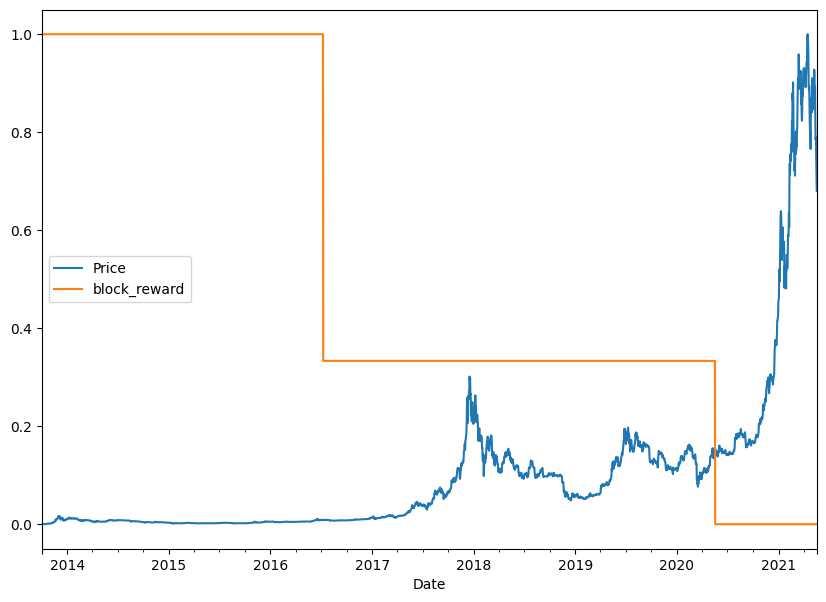

In [28]:
#plot the block_reward vs prices over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),

                                     columns = bitcoin_prices_block.columns,
                                     index = bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize = (10,7));

## Making a windowed dataset with pandas

Previously, we've turned our univariate time series into windowed dataset using the helper function above.

However, since we've got multivariate data, these functions won't work.

not to worry, we can use the pandas.DaraFrame.shift() method to window our multivariate data.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html

In [29]:
# setup hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [30]:
#make a copy of the butocin historical data with block reward column
bitcoin_prices_windowed = bitcoin_prices_block.copy()

#add windowed columns
for i in range(WINDOW_SIZE): #shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods = i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we've done is created a way to window our dataset directly from a pandas dataframe.


In [31]:
#create X(windows) and Y(horizons) feature

X = bitcoin_prices_windowed.dropna().drop("Price", axis = 1).astype(np.float32)
Y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

In [32]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, Y_train = X[:split_size], Y[:split_size]
X_test, Y_test = X[split_size:], Y[split_size:]
len(X_train), len(X_test)

(2224, 556)

In [33]:
X_train

,block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661
...,...,...,...,...,...,...,...,...
2019-11-05,12.5,9202.415039,9290.896484,9197.632812,9131.410156,9225.995117,9455.724609,9458.223633
2019-11-06,12.5,9369.627930,9202.415039,9290.896484,9197.632812,9131.410156,9225.995117,9455.724609
2019-11-07,12.5,9326.599609,9369.627930,9202.415039,9290.896484,9197.632812,9131.410156,9225.995117


## Model6: Dense(multivariate time series)


In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers

#make multivariate time series model
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation ='relu'),
    layers.Dense(HORIZON)
], name = "MOdel_6_dense_multivariate")

#compile themodel
model_6.compile(loss = 'mae',
                optimizer = 'adam')

#fit
model_6.fit(x = X_train,
            y = Y_train,
            epochs = 100,
            batch_size = 128,
            verbose = 1,
            validation_data = (X_test, Y_test),
            callbacks = [create_model_checkpoint(model_name = model_6.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 11s - loss: 2397.1804

18/18 [==============================] - 1s 44ms/step - loss: 862.5125 - val_loss: 2336.7078
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 358.4840

18/18 [==============================] - 1s 35ms/step - loss: 246.7526 - val_loss: 1201.0081
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 151.5207

18/18 [==============================] - 1s 35ms/step - loss: 190.6548 - val_loss: 1044.6486
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 224.5269

18/18 [==============================] - 1s 34ms/step - loss: 176.1993 - val_loss: 1011.4424
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 169.5988

18/18 [==============================] - 1s 36ms/step - loss: 172.5920 - val_loss: 943.5189
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 172.7083 - val_loss: 963.5247
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 202.8209

18/18 [==============================] - 1s 36ms/step - loss: 166.4668 - val_loss: 898.4336
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 132.4371

18/18 [==============================] - 1s 35ms/step - loss: 161.9122 - val_loss: 881.4938
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 134.4104

18/18 [==============================] - 1s 37ms/step - loss: 159.5530 - val_loss: 868.8429
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 161.9893

18/18 [==============================] - 1s 35ms/step - loss: 154.0581 - val_loss: 835.8624
Epoch 11/100
18/18 [==============================] - 0s 5ms/step - loss: 149.2729 - val_loss: 889.1481
Epoch 12/100
18/18 [==============================] - 0s 4ms/step - loss: 148.1953 - val_loss: 901.3729
Epoch 13/100
18/18 [==============================] - 0s 4ms/step - loss: 146.9612 - val_loss: 847.8682
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 141.6962 - val_loss: 840.7303
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 147.5589

18/18 [==============================] - 1s 37ms/step - loss: 143.0125 - val_loss: 760.2151
Epoch 16/100
18/18 [==============================] - 0s 4ms/step - loss: 135.1588 - val_loss: 775.1765
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 134.1369 - val_loss: 808.2898
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 150.7420

18/18 [==============================] - 1s 34ms/step - loss: 135.1922 - val_loss: 736.0207
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 130.6989 - val_loss: 739.3193
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 149.0893

18/18 [==============================] - 1s 37ms/step - loss: 128.2045 - val_loss: 706.7284
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 171.0598

18/18 [==============================] - 1s 36ms/step - loss: 130.5240 - val_loss: 688.4522
Epoch 22/100
18/18 [==============================] - 0s 4ms/step - loss: 127.1582 - val_loss: 702.0948
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 129.7495 - val_loss: 693.0218
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 133.6129

18/18 [==============================] - 1s 38ms/step - loss: 124.8611 - val_loss: 670.8188
Epoch 25/100
13/18 [====================>.........] - ETA: 0s - loss: 125.7738

18/18 [==============================] - 1s 52ms/step - loss: 122.5031 - val_loss: 660.5983
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 116.8998

18/18 [==============================] - 1s 79ms/step - loss: 121.5309 - val_loss: 655.5223
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 171.9237

18/18 [==============================] - 1s 40ms/step - loss: 121.7710 - val_loss: 654.4069
Epoch 28/100
18/18 [==============================] - 0s 4ms/step - loss: 119.4681 - val_loss: 656.0180
Epoch 29/100
18/18 [==============================] - ETA: 0s - loss: 119.4578

18/18 [==============================] - 1s 76ms/step - loss: 119.4578 - val_loss: 637.0408
Epoch 30/100
16/18 [=========================>....] - ETA: 0s - loss: 121.6223

18/18 [==============================] - 1s 75ms/step - loss: 123.2479 - val_loss: 631.5107
Epoch 31/100
18/18 [==============================] - 0s 12ms/step - loss: 122.8575 - val_loss: 634.0323
Epoch 32/100
 7/18 [==========>...................] - ETA: 0s - loss: 121.4822

18/18 [==============================] - 1s 80ms/step - loss: 117.3859 - val_loss: 629.1232
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 145.0282

18/18 [==============================] - 1s 55ms/step - loss: 115.2423 - val_loss: 623.6370
Epoch 34/100
18/18 [==============================] - 0s 4ms/step - loss: 115.3540 - val_loss: 650.4983
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 115.1022

18/18 [==============================] - 2s 114ms/step - loss: 115.0901 - val_loss: 611.4130
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 157.9553

18/18 [==============================] - 1s 50ms/step - loss: 114.8231 - val_loss: 610.7061
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 138.5254

18/18 [==============================] - 1s 62ms/step - loss: 112.8275 - val_loss: 607.7667
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 114.0749 - val_loss: 613.1888
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 129.9196

18/18 [==============================] - 2s 110ms/step - loss: 114.6529 - val_loss: 606.3340
Epoch 40/100
18/18 [==============================] - ETA: 0s - loss: 112.4259

18/18 [==============================] - 1s 84ms/step - loss: 112.4259 - val_loss: 600.4016
Epoch 41/100
12/18 [===================>..........] - ETA: 0s - loss: 112.8220

18/18 [==============================] - 1s 58ms/step - loss: 111.4401 - val_loss: 594.5576
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 118.8705 - val_loss: 704.0714
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 124.8439 - val_loss: 695.6957
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 125.0713 - val_loss: 601.1083
Epoch 45/100
18/18 [==============================] - 0s 8ms/step - loss: 111.0305 - val_loss: 597.4324
Epoch 46/100
18/18 [==============================] - 0s 4ms/step - loss: 117.4520 - val_loss: 617.5511
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 115.5461 - val_loss: 684.4276
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 112.4238 - val_loss: 628.6680
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 165.1720

18/18 [==============================] - 1s 47ms/step - loss: 115.4447 - val_loss: 586.9871
Epoch 50/100
18/18 [==============================] - 0s 11ms/step - loss: 111.8383 - val_loss: 666.5171
Epoch 51/100
18/18 [==============================] - 0s 11ms/step - loss: 115.2949 - val_loss: 633.5814
Epoch 52/100
12/18 [===================>..........] - ETA: 0s - loss: 121.5385

18/18 [==============================] - 1s 84ms/step - loss: 114.4693 - val_loss: 584.6521
Epoch 53/100
18/18 [==============================] - 0s 8ms/step - loss: 111.9103 - val_loss: 659.2036
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 112.9243 - val_loss: 591.6262
Epoch 55/100
18/18 [==============================] - 0s 4ms/step - loss: 111.7067 - val_loss: 613.1495
Epoch 56/100
18/18 [==============================] - 0s 9ms/step - loss: 114.5193 - val_loss: 819.1453
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 130.6599 - val_loss: 686.5850
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 116.1779 - val_loss: 633.0589
Epoch 59/100
18/18 [==============================] - 0s 6ms/step - loss: 110.8138 - val_loss: 643.2394
Epoch 60/100
18/18 [==============================] - 0s 9ms/step - loss: 112.7353 - val_loss: 675.3675
Epoch 61/100
15/18 [========================>.....] - ETA: 0s - loss: 113.61

18/18 [==============================] - 1s 44ms/step - loss: 112.4654 - val_loss: 577.1611
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 74.8030

18/18 [==============================] - 1s 47ms/step - loss: 107.6602 - val_loss: 576.7541
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 109.5907 - val_loss: 602.9803
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 109.9926 - val_loss: 579.4272
Epoch 65/100
18/18 [==============================] - 0s 8ms/step - loss: 108.1705 - val_loss: 578.3505
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 107.3889 - val_loss: 577.1453
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 106.8301 - val_loss: 615.7472
Epoch 68/100
 1/18 [>.............................] - ETA: 0s - loss: 67.1566

18/18 [==============================] - 1s 48ms/step - loss: 107.2241 - val_loss: 576.6270
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 113.1663 - val_loss: 695.3278
Epoch 70/100
15/18 [========================>.....] - ETA: 0s - loss: 120.9065

18/18 [==============================] - 2s 89ms/step - loss: 121.0461 - val_loss: 576.5719
Epoch 71/100
 1/18 [>.............................] - ETA: 0s - loss: 86.8875

18/18 [==============================] - 1s 76ms/step - loss: 108.5876 - val_loss: 574.5422
Epoch 72/100
18/18 [==============================] - 0s 11ms/step - loss: 111.1688 - val_loss: 586.8595
Epoch 73/100
18/18 [==============================] - 0s 7ms/step - loss: 115.4213 - val_loss: 675.5490
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 108.1913 - val_loss: 576.9797
Epoch 75/100
18/18 [==============================] - 0s 12ms/step - loss: 109.8950 - val_loss: 575.3591
Epoch 76/100
 9/18 [==============>...............] - ETA: 0s - loss: 113.9555

18/18 [==============================] - 2s 93ms/step - loss: 109.7003 - val_loss: 572.3893
Epoch 77/100
18/18 [==============================] - 0s 9ms/step - loss: 107.7883 - val_loss: 589.6709
Epoch 78/100
18/18 [==============================] - 0s 7ms/step - loss: 110.7264 - val_loss: 573.2407
Epoch 79/100
18/18 [==============================] - 0s 7ms/step - loss: 107.7302 - val_loss: 576.1127
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 107.3336 - val_loss: 597.6025
Epoch 81/100
18/18 [==============================] - 0s 7ms/step - loss: 107.5489 - val_loss: 573.9960
Epoch 82/100
13/18 [====================>.........] - ETA: 0s - loss: 120.0105

18/18 [==============================] - 1s 63ms/step - loss: 117.6410 - val_loss: 571.9836
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 113.9073 - val_loss: 760.7136
Epoch 84/100
 1/18 [>.............................] - ETA: 0s - loss: 136.5497

18/18 [==============================] - 1s 67ms/step - loss: 116.6581 - val_loss: 570.7963
Epoch 85/100
 1/18 [>.............................] - ETA: 0s - loss: 77.0282

18/18 [==============================] - 1s 71ms/step - loss: 107.7165 - val_loss: 570.0380
Epoch 86/100
18/18 [==============================] - 0s 11ms/step - loss: 105.4644 - val_loss: 571.4343
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 105.0510 - val_loss: 583.8751
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 108.5841 - val_loss: 570.0386
Epoch 89/100
18/18 [==============================] - 0s 4ms/step - loss: 107.1292 - val_loss: 583.2318
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 106.2011 - val_loss: 588.1860
Epoch 91/100
 1/18 [>.............................] - ETA: 0s - loss: 88.1736

18/18 [==============================] - 1s 36ms/step - loss: 108.6484 - val_loss: 568.3213
Epoch 92/100
18/18 [==============================] - 0s 4ms/step - loss: 109.5883 - val_loss: 625.6677
Epoch 93/100
18/18 [==============================] - 0s 4ms/step - loss: 121.8238 - val_loss: 655.8237
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 113.3043 - val_loss: 582.7354
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 105.7273 - val_loss: 568.7006
Epoch 96/100
18/18 [==============================] - 0s 4ms/step - loss: 109.4930 - val_loss: 615.2800
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 109.2811 - val_loss: 572.4741
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 105.2401 - val_loss: 590.2148
Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 107.0129 - val_loss: 572.5205
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 1

In [ ]:
model_6.summary()

Model: "MOdel_6_dense_multivariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               1152      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#evaluate model
model_6.evaluate(X_test, Y_test)

18/18 [==============================] - 0s 2ms/step - loss: 631.6115


631.6114501953125

In [ ]:
#load in the best performing model
model_6 = tf.keras.models.load_model("/content/model_experiments/MOdel_6_dense_multivariate")
model_6.evaluate(X_test, Y_test)

18/18 [==============================] - 0s 2ms/step - loss: 568.3213


568.3212890625

In [ ]:
#make predictions
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8841.481 , 8778.316 , 9050.074 , 8742.557 , 8740.8125, 8784.871 ,
       8651.068 , 8517.977 , 8473.546 , 8528.919 ], dtype=float32)>

In [ ]:
#evaluate predictions
model_6_results = evaluate_preds(y_true = Y_test,
                                y_pred = model_6_preds)

model_6_results

{'mae': 568.3212,
 'mse': 1158368.9,
 'rmse': 1076.2755,
 'mape': 2.5451784,
 'mase': 0.998383}

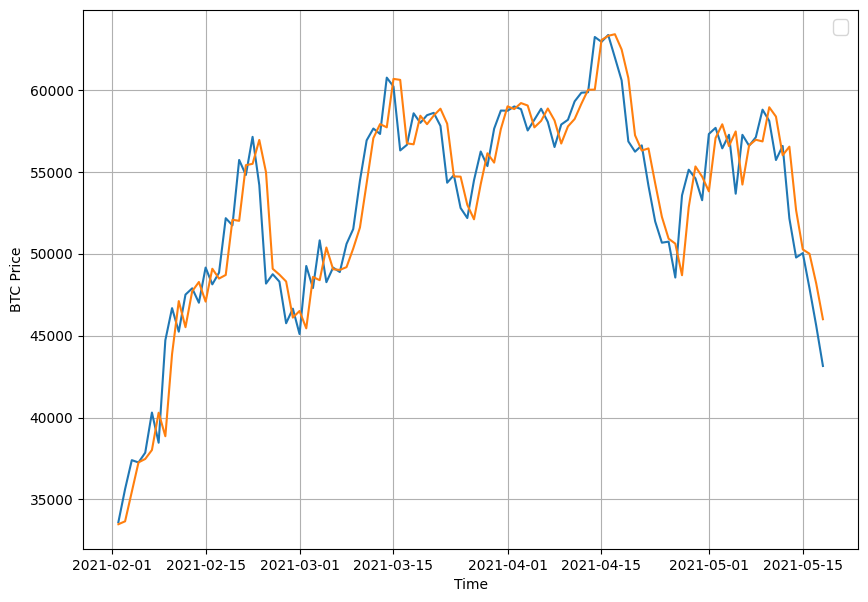

In [ ]:
offset = 450
plt.figure(figsize = (10, 7))
#account for test_window offset when parsing
plot_time_series(timesteps = x_test[-len(test_windows):],
                 values = test_labels[:],
                 start = offset,
                 label = "test_data")

plot_time_series(timesteps = x_test[-len(test_windows):],
                 values = model_6_preds[:],
                 start = offset,
                 label = "model_6_preds")




## Model7: N-BEATS algortihm

reference paper: https://arxiv.org/abs/1905.10437

### Building and testing the N-BEATS block layer

Since N-BEATS layer does not exist already, we will create it using subbclassing
https://www.tensorflow.org/guide/keras/making_new_layers_and_models_via_subclassing


In [47]:
WINDOW_SIZE = 7
HORIZON = 1

In [48]:
import tensorflow as tf

#create N-BEATS custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
              input_size: int,
              theta_size: int,
              horizon: int,
              n_neurons: int,
              n_layers: int,
              **kwargs): #take care of the keyword parameters which are not defined in the function signature
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.n_neurons = n_neurons
    self.n_layers = n_layers
    self.horizon = horizon

    #block contains stack of fully connect layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation = 'relu') for _ in range(n_layers)]
    #output of the block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation = 'linear', name = 'theta_layer')

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    #output the backcast and the forecast from the theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

Let's test our NBeatsBlock class.

To do we'll make some dummy inputs and outputs.

In [49]:
dummy_nbeats_block_layer = NBeatsBlock(input_size = WINDOW_SIZE,
                                       theta_size = WINDOW_SIZE + HORIZON,
                                       horizon = HORIZON,
                                       n_neurons = 128,
                                       n_layers = 4)

In [50]:
#create dummy inputs (have to be same _size as input_size
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis = 0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [51]:
#pass dummy inputs to dummy NBeats laeyr
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
backcast.numpy(), forecast.numpy()

(array([[ 0.11212301, -0.04984114,  0.12273887,  0.3037695 ,  1.1117703 ,
          0.7396066 ,  0.07908327]], dtype=float32),
 array([[0.02172153]], dtype=float32))

## Preparing data for the N-BEATS algorithm using `tf.data` API

In [34]:
WINDOW_SIZE = 7
HORIZON = 1

In [35]:
#create N-BEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [36]:
#Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+ {i+ 1} "] = bitcoin_prices_nbeats["Price"].shift(periods = i+1)
bitcoin_prices_nbeats.head()

,Price,Price+ 1,Price+ 2,Price+ 3,Price+ 4,Price+ 5,Price+ 6,Price+ 7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [37]:
#make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis = 1)


Y = bitcoin_prices_nbeats.dropna()["Price"]

#make traina dntest splits
split_size = int(len(X)*0.8)

X_train, Y_train = X[:split_size], Y[:split_size]
X_test, Y_test = X[split_size:], Y[split_size:]

len(X_train), len(Y_train)

(2224, 2224)

In [39]:
import tensorflow as tf

# Time to make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(Y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(Y_test)

#combine labels and features by zipping together-> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

#Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset


(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm


In [ ]:
#values from N_BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON



### getting ready for residual connections

In [ ]:
from tensorflow.keras import layers
#make tensors
tensor_1 = tf.range(10) +10
tensor_2 = tf.range(10)

#subtract
subtracted = layers.subtract([tensor_1, tensor_2])

added = layers.add([tensor_1, tensor_2])
subtracted, added

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)>)

### Building compilining and fitting the N-BEATS algortihm


In [ ]:

tf.random.set_seed(42)

#1.setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size = INPUT_SIZE,
                                 theta_size = THETA_SIZE,
                                 horizon = HORIZON,
                                 n_neurons = N_NEURONS,
                                 n_layers = N_LAYERS,
                                 name = 'InitialBlock')

#2. Create input to stack
stack_input = layers.Input(shape = (INPUT_SIZE), name = "input_layer")

#3.Create initial backcast and forecast input(backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

#4. create stacks of block layers
for i, _ in enumerate(range(N_STACKS - 1)):

  #5. use the nbeats block to calculate the forecast as well as the backcast
  backcast, block_forecast = NBeatsBlock(
      input_size = INPUT_SIZE,
      theta_size = THETA_SIZE,
      horizon = HORIZON,
      n_neurons = N_NEURONS,
      n_layers = N_LAYERS,
      name = f"NBeatsBlock_{i}"
  )(residuals)
  #6. create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name = f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name = f"name_{i}")

#7. put together the inputs and outputs
model_7 = tf.keras.Model(inputs = stack_input, outputs = forecast, name = "model_7_NBeats")


#compile model with mae loss
model_7.compile(loss = 'mae',
                optimizer = 'adam',
                )

#fir the model with callbacks
model_7.fit(train_dataset,
            epochs = N_EPOCHS,
            verbose = 0,
            validation_data = test_dataset,
            callbacks = [tf.keras.callbacks.EarlyStopping(monitor = "val_loss",
                                                          patience = 200,
                                                          restore_best_weights = True),
                         tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss",
                                                              patience = 100,
                                                              verbose = 1)

                         ]
            )


Epoch 611: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 711: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.


In [ ]:
model_7.summary()

Model: "model_7_NBeats"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 7)]          0           []                               
                                                                                                  
 InitialBlock (NBeatsBlock)     ((None, 7),          796168      ['input_layer[0][0]']            
                                 (None, 1))                                                       
                                                                                                  
 NBeatsBlock_0 (NBeatsBlock)    ((None, 7),          796168      ['InitialBlock[0][0]']           
                                 (None, 1))                                                       
                                                                                     

In [ ]:
#luate N-Beats model on the ataset
model_7 = tf.keras.models.load_model("")
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 40ms/step - loss: 583.2481


583.2481079101562

In [ ]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8909.223, 8787.182, 8999.073, 8803.459, 8717.178, 8741.254,
       8685.936, 8520.998, 8466.862, 8510.15 ], dtype=float32)>

In [ ]:
y_test[:10].shape

(10,)

In [ ]:
model_7_results = evaluate_preds(y_true = y_test,
                                 y_pred = model_7_preds)
model_7_results

In [ ]:
offset = 450
plt.figure(figsize = (10, 7))
#account for test_window offset when parsing
plot_time_series(timesteps = x_test[-len(test_windows):],
                 values = test_labels[:],
                 start = offset,
                 label = "test_data")

plot_time_series(timesteps = x_test[-len(test_windows):],
                 values = model_7_preds[:],
                 start = offset,
                 label = "model_7_preds")




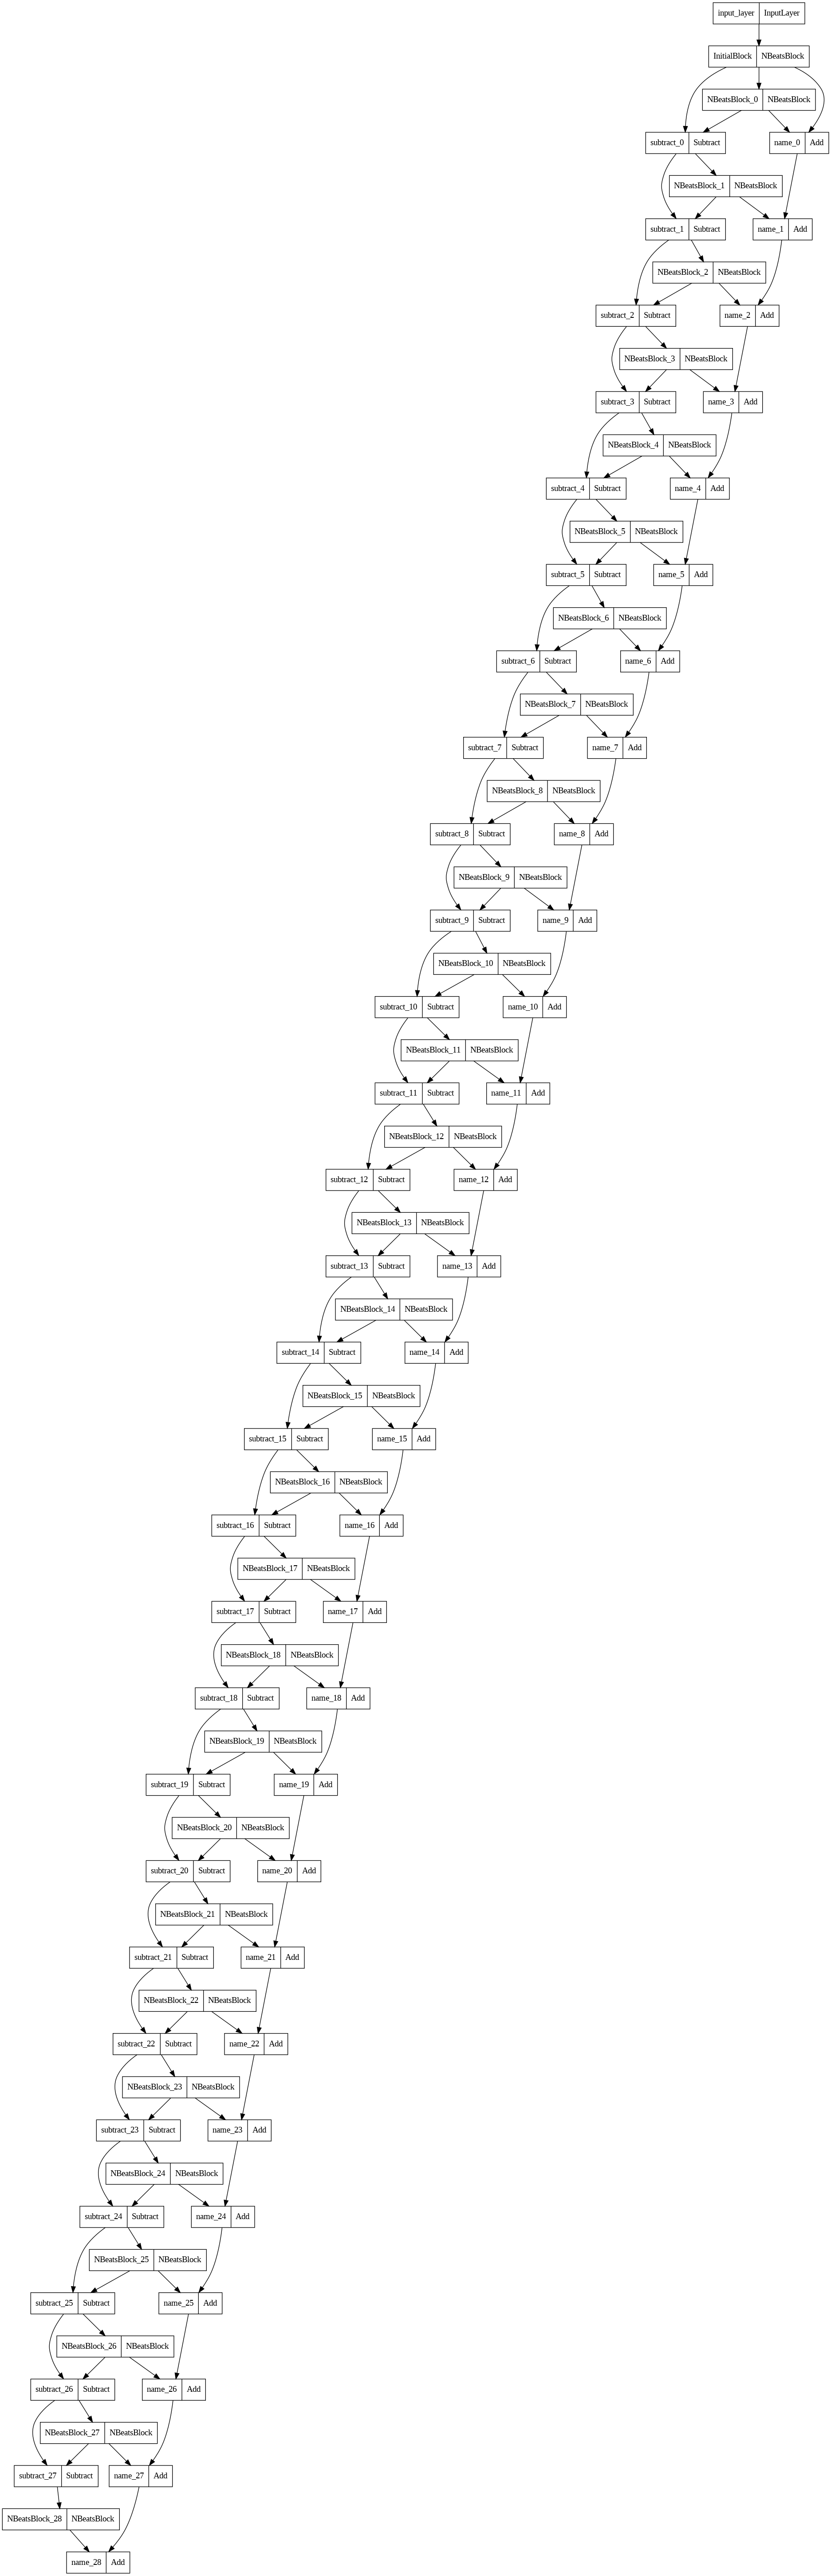

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an Ensemble (stacking multiple models together)

In [40]:
HORIZON = 1
WINDOW_SIZE = 7

In [41]:
from tensorflow.keras import layers

### Constructing and fitting and ensemble of models (using different loss fuinctions than the N-BEATS paper)

In [ ]:
def get_ensemble_models(horizon = HORIZON,
                        train_data = train_dataset,
                        test_data = test_dataset,
                        num_iter = 10,
                        num_epochs = 1000,
                        loss_fns = ["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter = 10, a list of 30 trained models will be returned:
  10*len(["mae", "mse", "mape"]).
  """
  #make empty list for ensemble models
  ensemble_models = []

  #create num_iter number of models per loss function
  for i in range(num_iter):
    #build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimising a model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      #Construct a simple model(similar to model_1)
      model = tf.keras.Sequential([
          #initialze dense layers with normal distribution for estimating prediction intervals later
          layers.Dense(128, kernel_initializer = 'he_normal', activation = 'relu'),
          layers.Dense(128, kernel_initializer = 'he_normal', activation = 'relu'),
          layers.Dense(HORIZON)
      ])

      #Compile the model with currect loss function
      model.compile(loss = loss_function,
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = ["mae", "mse"])

      #fit the model
      model.fit(train_data,
                epochs =num_epochs,
                verbose = 0,
                validation_data=test_data,
                callbacks = [tf.keras.callbacks.EarlyStopping(monitor = "val_loss",
                                                              patience = 200,
                                                              restore_best_weights = True,
                                                              ),
                             tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss",
                                                                  patience = 100,
                                                                  verbose = 1)])



      #append fitted model to list of ensemble model
      ensemble_models.append(model)
  return ensemble_models


In [ ]:
%%time

#Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter = 5,
                                      num_epochs = 1000)

Optimising a model by reducing: mae for 1000 epochs, model number: 0

Epoch 309: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 778: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 878: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimising a model by reducing: mse for 1000 epochs, model number: 0

Epoch 368: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 468: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimising a model by reducing: mape for 1000 epochs, model number: 0

Epoch 448: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimising a model by reducing: mae for 1000 epochs, model number: 1

Epoch 538: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 796: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 896: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Opt

In [ ]:
len(ensemble_models)

15

In [ ]:
ensemble_models

### make predictions with our ensemble model


In [ ]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models,
                                     data = test_dataset)

1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 37ms/step
CPU times: user 690 ms, sys: 26.9 ms, total: 717 ms
Wall time: 847 ms


In [ ]:
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8846.047 ,  8750.792 ,  9126.582 , ..., 49633.754 , 48849.195 ,
        45855.465 ],
       [ 8802.973 ,  8743.943 ,  9066.139 , ..., 50655.285 , 48800.51  ,
        45891.387 ],
       [ 8784.585 ,  8790.79  ,  9088.649 , ..., 50243.844 , 48165.734 ,
        46479.03  ],
       ...,
       [ 8778.064 ,  8845.383 ,  9136.283 , ..., 49037.484 , 47427.2   ,
        45595.176 ],
       [ 8737.957 ,  8732.331 ,  9028.539 , ..., 49666.957 , 48585.652 ,
        45975.617 ],
       [ 8825.8125,  8823.36  ,  9099.859 , ..., 49475.797 , 48311.938 ,
        46374.57  ]], dtype=float32)>

In [ ]:
#Evaluate ensemble model predictions
ensemble_mean = tf.reduce_mean(ensemble_preds, axis = 0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8785.14 , 8772.317, 9065.244, 8703.084, 8728.286, 8729.878,
       8645.817, 8483.35 , 8452.449, 8519.48 ], dtype=float32)>

In [ ]:
import numpy as np
ensemble_median = np.median(ensemble_preds, axis = 0)
ensemble_median[:10]
ensemble_median.shape

(556,)

In [ ]:
y_test[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

In [ ]:
ensemble_mean.shape

TensorShape([556])

In [ ]:
y_test[:-2].shape

(556,)

In [ ]:
ensemble_results_mean = evaluate_preds(y_true = y_test[:-2],
                                      y_pred = ensemble_mean)
ensemble_results_mean

{'mae': 548.9257,
 'mse': 1068685.1,
 'rmse': 1033.7722,
 'mape': 2.4966748,
 'mase': 0.9776331}

In [ ]:
ensemble_results_median  = evaluate_preds(y_true = y_test[:-2],
                                         y_pred = ensemble_median)
ensemble_results_median

{'mae': 550.1568,
 'mse': 1082995.4,
 'rmse': 1040.6707,
 'mape': 2.5013845,
 'mase': 0.9798257}

### Plotting the prediction intervals (uncertainity estimates) of our ensemble

So far we've been making point predictions with our models.

But it would be helpful if we could get a range of values instead,

like, instead of 48000 we could get 47000-49000 .

One way to get the 95% confidence prediction intervals for a deep learning model is the bootstrap method
1. Take the predictions ffrom a number of randomly initialized models (we've got this thanks to our ensemble model)
2. Measure the standard deviations of the prediction.
3. Multiply the standrd deviation by 1.96 (assuming the distribution is gaussian, 95% observtions fall within 1.96 standard deviations of the mean)
4. To get the prediciton interval upper and lower bound, add and subtract the value obtained in (3) to the mean/median of the predictions made in(1)

In [ ]:
#find the upper and lower bounds on ensemble predictions
def get_upper_lower_preds(preds):

  std = tf.math.reduce_std(preds, axis = 0)

  interval = 1.96 *std
  preds_mean = tf.reduce_mean(preds, axis = 0)
  lower, upper = preds_mean-interval, preds_mean+interval

  return lower, upper

In [ ]:
#get the lower and upper bounds
lower, upper = get_upper_lower_preds(preds = ensemble_preds)
lower[:10], upper[:10]

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8709.414, 8699.617, 8996.094, 8593.486, 8617.054, 8653.529,
        8588.227, 8407.396, 8391.178, 8476.825], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8860.865, 8845.018, 9134.395, 8812.682, 8839.519, 8806.227,
        8703.408, 8559.303, 8513.721, 8562.136], dtype=float32)>)

In [ ]:
x_test.inde[offset:]

array(['2021-03-22T00:00:00.000000000', '2021-03-23T00:00:00.000000000',
       '2021-03-24T00:00:00.000000000', '2021-03-25T00:00:00.000000000',
       '2021-03-26T00:00:00.000000000', '2021-03-27T00:00:00.000000000',
       '2021-03-28T00:00:00.000000000', '2021-03-29T00:00:00.000000000',
       '2021-03-30T00:00:00.000000000', '2021-03-31T00:00:00.000000000',
       '2021-04-01T00:00:00.000000000', '2021-04-02T00:00:00.000000000',
       '2021-04-03T00:00:00.000000000', '2021-04-04T00:00:00.000000000',
       '2021-04-05T00:00:00.000000000', '2021-04-06T00:00:00.000000000',
       '2021-04-07T00:00:00.000000000', '2021-04-08T00:00:00.000000000',
       '2021-04-09T00:00:00.000000000', '2021-04-10T00:00:00.000000000',
       '2021-04-11T00:00:00.000000000', '2021-04-12T00:00:00.000000000',
       '2021-04-13T00:00:00.000000000', '2021-04-14T00:00:00.000000000',
       '2021-04-15T00:00:00.000000000', '2021-04-16T00:00:00.000000000',
       '2021-04-17T00:00:00.000000000', '2021-04-18

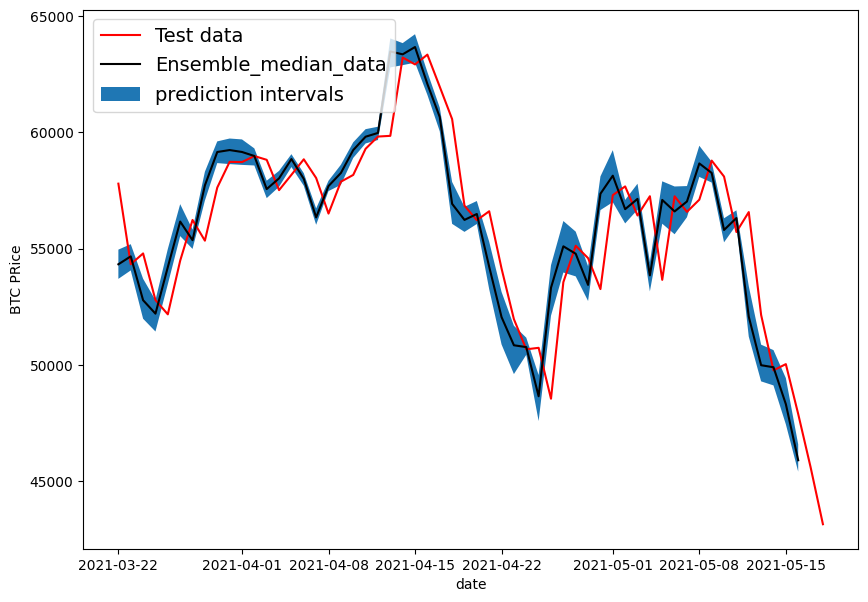

In [ ]:
#get the medain values
ensemble_median = np.median(ensemble_preds, axis = 0)

offset =500
plt.figure(figsize = (10,7))
plt.plot(x_test[offset:], y_test[offset:], "r", label ="Test data")
plt.plot(x_test[offset:-2], ensemble_median[offset:], "k-", label = "Ensemble_median_data")

plt.xlabel("date")
plt.ylabel("BTC PRice")
plt.fill_between(x_test[offset:-2],
                 (lower)[offset:],
                 (upper)[offset:], label = "prediction intervals")
plt.legend(loc = "upper left", fontsize = 14);

## Model  9: train a model on the full historical data to make predictions inot the future

In [71]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [72]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [75]:
#train model on entire data to make oredictions for the next day
x_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis = 1).to_numpy()
#get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(x_all), len(y_all)

(2780, 2780)

In [78]:
#turn data into efficient running tensors
features_dataset_all = tf.data.Dataset.from_tensor_slices(x_all)
label_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

#combine featurres and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, label_dataset_all))

#batch and prefetch for optimal perfomance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [81]:
from tensorflow.keras import layers
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON )
])

model_9.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam())

model_9.fit(dataset_all,
            epochs = 100,
            verbose = 0
            )

### Make predictions into future

In [83]:
# how many timesteps to predict into the future?
INTO_FUTURE = 14


In [133]:
#1. create function to make predictions into the future
def make_future_forecasts(values, model, into_future, window_size = WINDOW_SIZE):
  """
  Make future forecasts into_future steps after values ends.
  Returns future forecasts as a list of floats.
  """
  future_forecasts = []
  last_window = values[-window_size:]

  for _ in range(INTO_FUTURE):
    future_pred = model.predict(tf.expand_dims(last_window, axis = 0))
    print(f"Prediction on:\n {last_window} is \n{tf.squeeze(future_pred).numpy()}")

    future_forecasts.append(tf.squeeze(future_pred).numpy())

    last_window = np.append(last_window, future_pred)[-window_size:]
  return future_forecasts


In [134]:
future_forecasts = make_future_forecasts(values = y_all,
                                         model = model_9,
                                         into_future = INTO_FUTURE,
                                         window_size = WINDOW_SIZE)

1/1 [==============================] - 0s 21ms/step
Prediction on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] is 
55362.74609375
1/1 [==============================] - 0s 19ms/step
Prediction on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55362.74609375] is 
51277.71484375
1/1 [==============================] - 0s 26ms/step
Prediction on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55362.74609375 51277.71484375] is 
49847.8046875
1/1 [==============================] - 0s 35ms/step
Prediction on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55362.74609375 51277.71484375 49847.8046875 ] is 
49913.04296875
1/1 [==============================] - 0s 37ms/step
Prediction on:
 [47885.62525472 45604.61575361 43144.47129086 55362.74609375
 51277.71484375 49847.8046875  49913.04296875] is 
45689.8984375
1/1 [======================

In [135]:
future_forecasts

[55362.746,
 51277.715,
 49847.805,
 49913.043,
 45689.9,
 45085.7,
 47929.082,
 53983.402,
 50953.445,
 49910.39,
 48297.246,
 44697.72,
 46431.887,
 50350.668]

###plotting the predictions against data

In [97]:
def get_future_dates( start_date, into_future, offset =1):
  """
  Returns and array ofdatetime values ranging from strt_date to start_date + into_future
  """
  start_date = start_date + np.timedelta64(offset, "D")
  end_date = start_date + np.timedelta64(into_future, "D")
  return np.arange(start_date, end_date, dtype = "datetime64[D]")

In [93]:
last_timestep = bitcoin_prices.index[-1]

In [98]:
next_time_steps = get_future_dates(start_date = last_timestep,
                                   into_future= INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

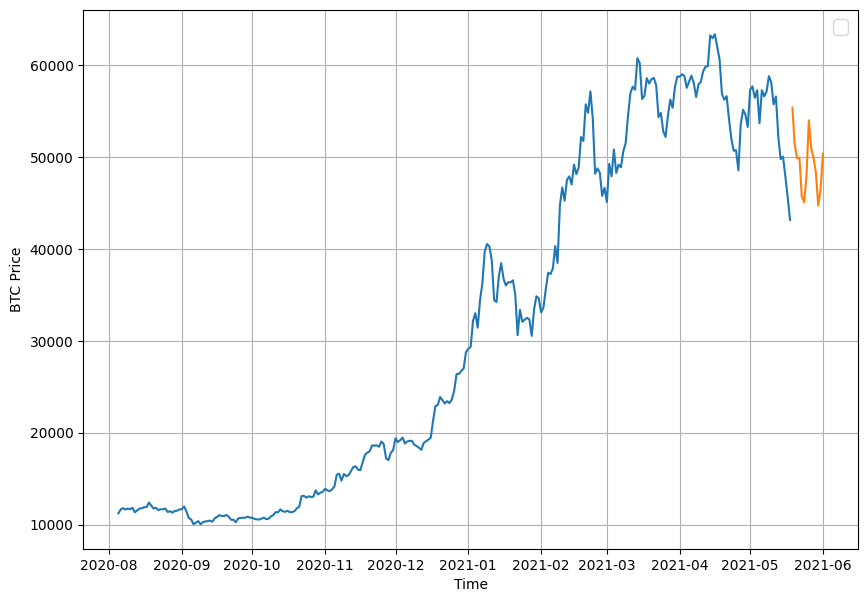

In [136]:
plt.figure(figsize = (10,7))
plot_time_series(bitcoin_prices.index, btc_prices, start = 2500, label = "actual timesteps" )
plot_time_series(next_time_steps, future_forecasts, label = "Predicted")

## Model 10: Model 1 with turkey data( why forecasting is bullshit)

In [44]:
# Let's intorduce a turkey problem to our BTC data (price of BTC falls 100x in one day)
btc_prices_turkey = btc_prices.copy()
btc_prices_turkey[-1] = btc_prices_turkey[-1]/100

In [46]:
btc_prices_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [47]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey

array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
       '2013-10-03T00:00:00.000000000', ...,
       '2021-05-16T00:00:00.000000000', '2021-05-17T00:00:00.000000000',
       '2021-05-18T00:00:00.000000000'], dtype='datetime64[ns]')

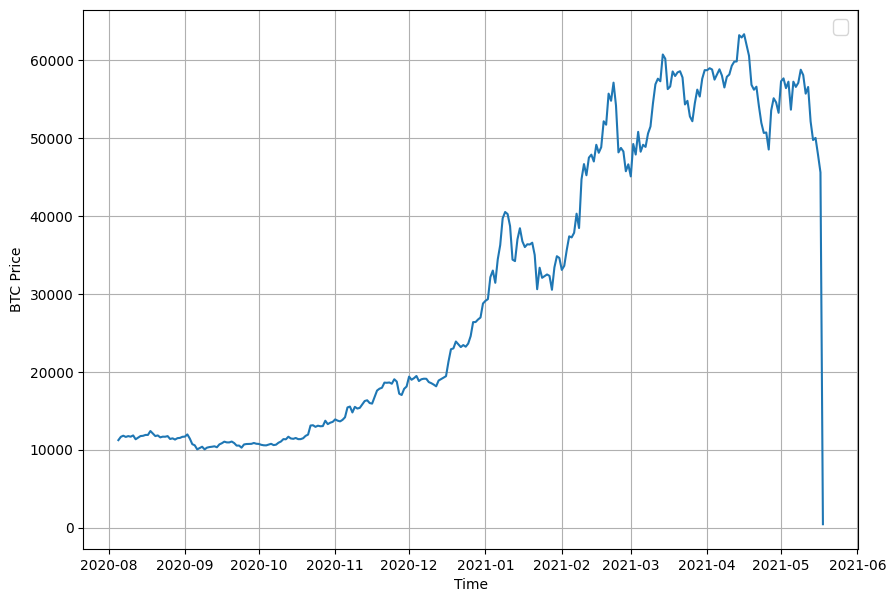

In [48]:
plt.figure(figsize = (10,7))
plot_time_series(timesteps = btc_timesteps_turkey,
                 values = btc_prices_turkey,
                 label = "BTC_prices + Turkey Problem",
                 start = 2500)

In [55]:
# create train and test sets for the turkey problem
full_windows, full_labels = make_windows(np.array(btc_prices_turkey),
                                         window_size = WINDOW_SIZE,
                                         horizon = HORIZON)

X_train, X_test, Y_train, Y_test = make_train_test_splits(full_windows, full_labels)

window indexes:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


### Build a turkey model

In [104]:
#clone model 1 architecture
turkey_model = tf.keras.models.clone_model(model_1)

In [108]:
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss = 'mae',
                     optimizer = tf.keras.optimizers.Adam())

turkey_model.fit(X_train,
                 Y_train,
                 epochs = 100,
                 verbose = 0,
                 batch_size = 128,
                 validation_data = (X_test, Y_test))


In [109]:
turkey_model.evaluate(X_test, Y_test)


18/18 [==============================] - 0s 2ms/step - loss: 845.7973


845.7973022460938